In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("pass_fail.csv")

In [3]:
df.head()

,hours_studied,previous_score,passed
0,1,10,0
1,2,20,0
2,3,15,0
3,4,40,0
4,5,50,1


In [4]:
#data clean
df.shape

(20, 3)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hours_studied   20 non-null     int64
 1   previous_score  20 non-null     int64
 2   passed          20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [7]:
df.isna().sum()

hours_studied     0
previous_score    0
passed            0
dtype: int64

In [8]:
df.describe()

,hours_studied,previous_score,passed
count,20.000000,20.000000,20.000000
mean,5.500000,55.200000,0.550000
std,2.946898,28.996552,0.510418
min,1.000000,10.000000,0.000000
25%,3.000000,32.500000,0.000000
50%,5.500000,57.500000,1.000000
75%,8.000000,81.250000,1.000000
max,10.000000,95.000000,1.000000


In [9]:
df.columns

Index(['hours_studied', 'previous_score', 'passed'], dtype='object')

<Axes: xlabel='hours_studied', ylabel='passed'>

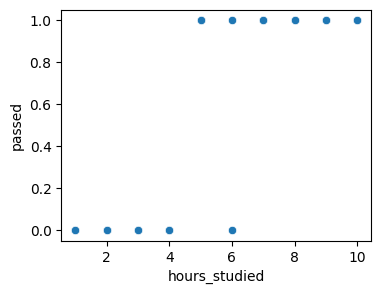

In [15]:
#visualaization
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='hours_studied', y='passed')

<Axes: xlabel='previous_score', ylabel='passed'>

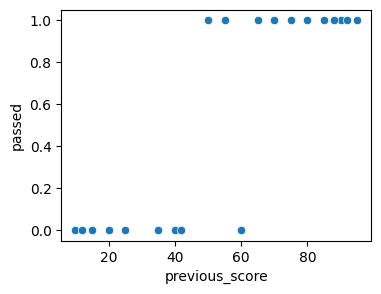

In [16]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='previous_score', y='passed')

In [17]:
df.corr()

,hours_studied,previous_score,passed
hours_studied,1.000000,0.985496,0.822287
previous_score,0.985496,1.000000,0.845641
passed,0.822287,0.845641,1.000000


<Axes: >

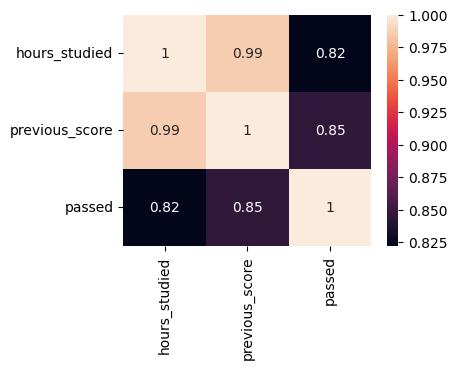

In [19]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True)

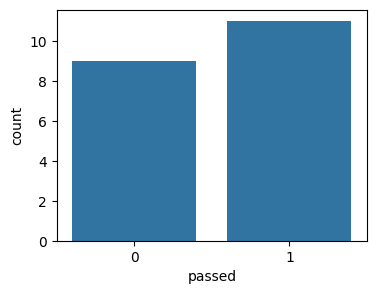

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='passed')
plt.show()

<Axes: xlabel='hours_studied', ylabel='previous_score'>

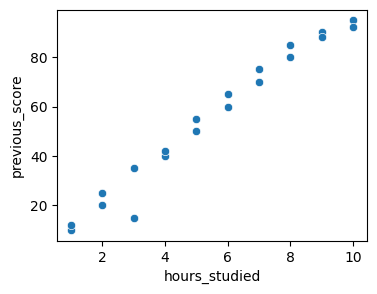

In [22]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='hours_studied', y='previous_score')

In [34]:
#feature target split
x = df[['hours_studied', ]]
y = df[['passed']]

In [35]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.1, random_state=42)

In [36]:
xtrain.head()

,hours_studied
15,8
1,2
8,9
5,6
11,3


In [37]:
ytrain.head()

,passed
15,1
1,0
8,1
5,0
11,0


In [38]:
xtest.head()

,hours_studied
0,1
17,10


In [39]:
ytest.head()

,passed
0,0
17,1


In [40]:
#model implementation
lr = LinearRegression()
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
model = lr.fit(xtrain, ytrain)

In [42]:
model.score(xtrain, ytrain)

0.6524096385542169

In [43]:
model.score(xtest, ytest)

0.848156570951365

In [45]:
m = model.coef_
m

array([[0.15261044]])

In [46]:
c = model.intercept_
c

array([-0.28380187])

In [47]:
pred_y = model.predict(xtest)

In [49]:
mae = mean_absolute_error(ytest, pred_y)
mae

0.18674698795180697

In [50]:
mse = mean_squared_error(ytest, pred_y)
mse

0.037960857262158754

In [51]:
r2 = r2_score(ytest, pred_y)
r2

0.848156570951365

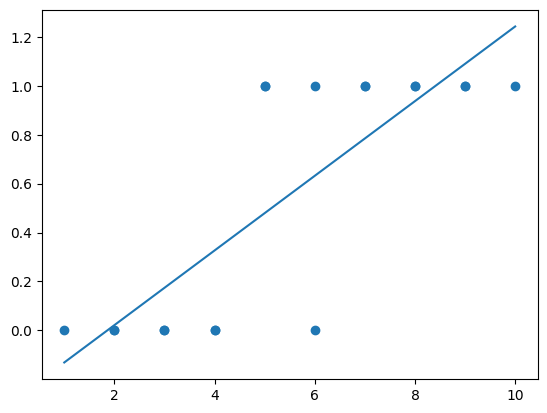

In [56]:
plt.scatter(xtrain, ytrain)
plt.plot(xtest, pred_y)
plt.show()

In [57]:
#logistic model implementation
los = LogisticRegression()

In [58]:
model2 = los.fit(xtrain, ytrain)

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
model2.score(xtrain, ytrain)

0.9444444444444444

In [60]:
model2.score(xtest, ytest)

1.0

In [65]:
los_pred_y = model2.predict(xtest)
los_pred_y

array([0, 1])

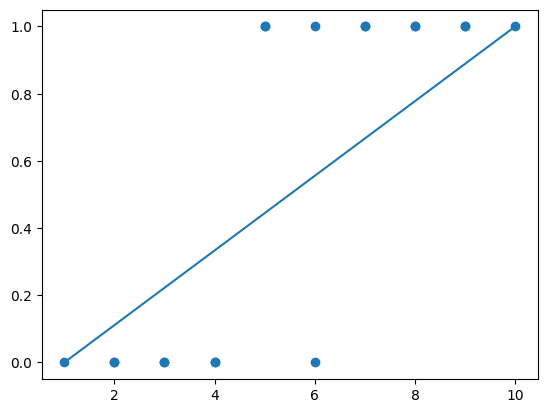

In [66]:
plt.scatter(xtrain, ytrain)
plt.plot(xtest, los_pred_y)
plt.show()